本练习源自吴恩达《机器学习》练习1——线性回归（参考黄海广的文档）

# 单变量线性回归（餐厅利润和城市人口数的关系）


In [157]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
#从txt文件导入数据，
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in range(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)


#打印出来看一下数据集大小  
data = load_data('ex1data1.txt')
print(data.shape)

X = data[:, :-1] #人口
y = data[:, -1:] #利润
print(X.shape) #二维数组
print(y.shape)

(97, 2)
(97, 1)
(97, 1)


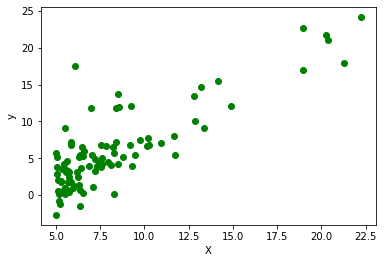

In [159]:
#plot data
#可视化一下数据集
plt.scatter(X,y,color = 'g')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# 损失函数和线性方程
损失函数：
$$ J( \theta )=\frac{1}{2m}\sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})^2 $$

其中：
$$ h_\theta \left( x \right) = \theta^{T}X=\theta_{0}+\theta_{1}x_{1} $$


In [160]:
num_train = X.shape[0]
one = np.ones((num_train, 1))  #用于构造 y = w0 + w1*x 中w0项的生成。
X = np.hstack((one, data[:,:-1])) #在水平方向拼接

W = np.zeros((2,1)) #w0 ,w1，初始化均为0.


"""定义损失函数计算公式"""
def compute_cost(X_test, y_test, theta):
    cost = np.sum(np.power(((X_test.dot(theta)) - y_test), 2)) / (2 * len(X_test))
    return cost


cost_1 = compute_cost(X, y, W)
print("当线性方程的w0,w1初始化为0,0时，代价函数的值为：", cost_1)
cost_2 = compute_cost(X, y, np.array([[-1],[2]]))
print("当线性方程的w0,w1初始化为-1,2时，代价函数的值为：", cost_2)

当线性方程的w0,w1初始化为0,0时，代价函数的值为： 32.072733877455676
当线性方程的w0,w1初始化为-1,2时，代价函数的值为： 54.24245508201238


# 批量梯度下降
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)   $$

上述公式在本案例中具体展开：

<img src="./1.png" width=550px>


In [186]:
"""梯度下降算法的实现"""
def gradient_descent(X_test, y_test, theta, alpha=0.01, iters = 1500):
    J_history = []
    theta_history = []
    num_X = X_test.shape[0]

    for i in range(iters):
        
        theta_history.append(theta)

        theta = theta - alpha * X_test.T.dot(X_test.dot(theta) - y_test) / num_X #点乘已经包括求和操作了，所以不要np.sum
        cost = compute_cost(X_test, y_test, theta)
        J_history.append(cost)
        

    return theta, J_history, theta_history


theta, J_history, theta_history = gradient_descent(X, y, np.array([[0],[0]]))
print(theta)



[[-3.63029144]
 [ 1.16636235]]


# 可视化回归效果和代价函数值的变化曲线

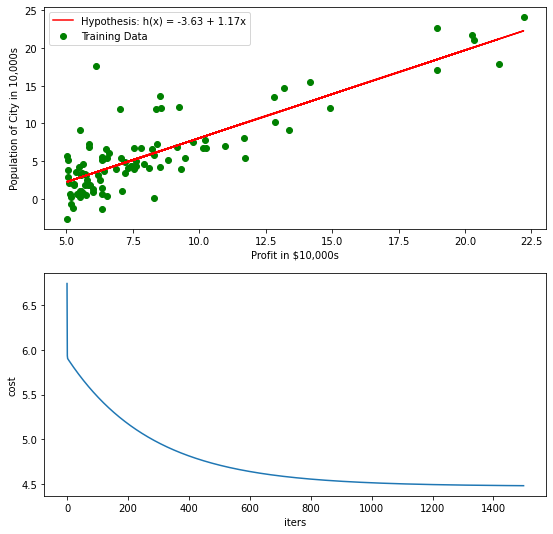

In [187]:

def myfit(x_val):
    return theta[0] + theta[1]*x_val

plt.figure(figsize=(9,9))

plt.subplot(211)
plt.scatter(X[:,1], y,color = 'g',label='Training Data')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.plot(X[:,1], myfit(X[:,1]),'-',color = 'r', label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend() # 将label显示出来

#可视化一下cost变化曲线
plt.subplot(212)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')

plt.show()


# 绘制梯度下降时，代价函数值的走势

<ipython-input-204-f50305d00258>:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


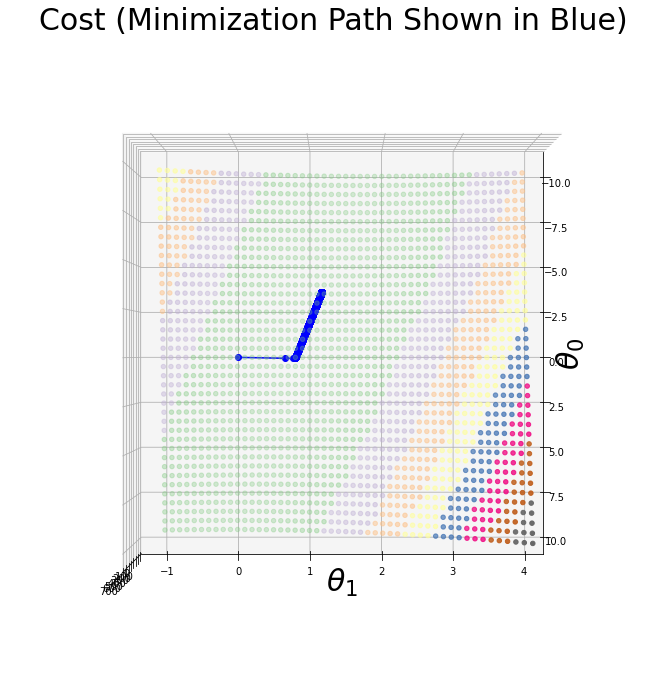

<ipython-input-204-f50305d00258>:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


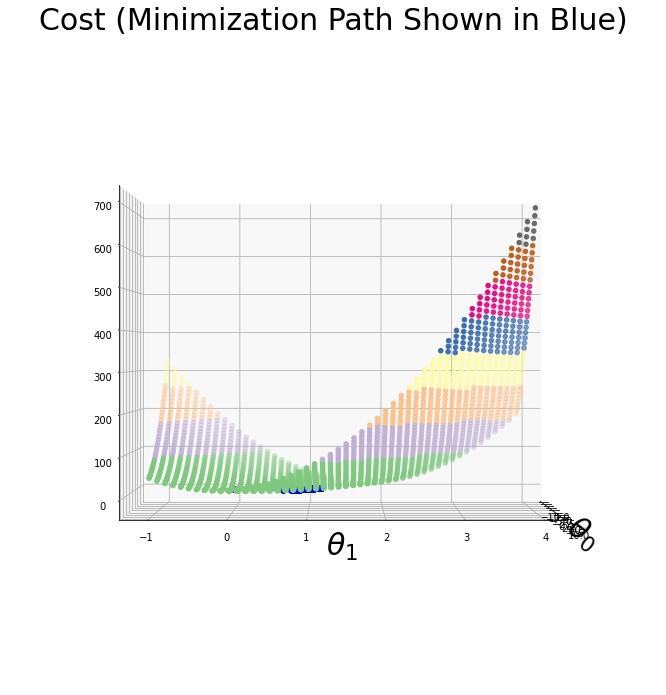

<ipython-input-204-f50305d00258>:49: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


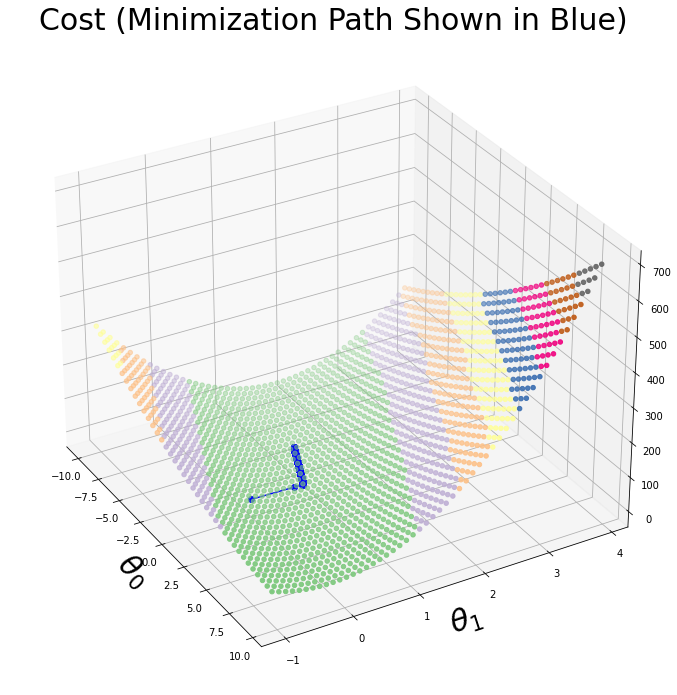

In [204]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm




xvals = np.arange(-10, 10, .5) # w0
yvals = np.arange(-1, 4, .1) # w1
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(compute_cost(X, y, np.array([[david], [kaleko]])))



"""俯视图"""
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
scat = ax.scatter(myxs, myys, myzs,c=np.abs(myzs),cmap=cm.Accent)
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0][0] for x in theta_history], [x[1][0] for x in theta_history], J_history,'bo-')

ax.view_init(90, 0) #改变图像角度
plt.show()



"""正视图"""
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
scat = ax.scatter(myxs, myys, myzs,c=np.abs(myzs),cmap=cm.Accent) #cm.Accent等高线绘色
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0][0] for x in theta_history], [x[1][0] for x in theta_history], J_history,'bo-')

ax.view_init(0, 0) #改变图像角度
plt.show()



"""其他角度视图"""
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
scat = ax.scatter(myxs, myys, myzs,c=np.abs(myzs),cmap=cm.Accent, ) #cm.Accent等高线绘色
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0][0] for x in theta_history], [x[1][0] for x in theta_history], J_history,'bo-')

ax.view_init(30, -30) #改变图像角度
plt.show()
